# Workspace \#8: ``data.py``

In [1]:
# %load firstcell.py
# autoreloading for imported modules
%load_ext autoreload
%autoreload 2

# getting future division
from __future__ import division

# numpy
import numpy as np
from numpy import pi, sqrt, log, log10, power, exp

#scipy
from scipy.interpolate import interp1d

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib.lines import Line2D

# other
import os
from tqdm import tqdm

# matplotlib style
%matplotlib inline

%config InlineBackend.figure_format = "retina"
rcParams['figure.figsize'] = (13, 8)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['New Times Roman']
rc('text', usetex=True)

# current directory
current_dir = os.getcwd()

In [2]:
from random import random

import sys
sys.path.insert(0, '../')

import tools as tl
import constants as ct
import particle as pt
import ska as sk
import astro as ap
import echo as ec
import routines as rt
import data as dt

/home/buenabad/anaconda2/lib/python2.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/buenabad/anaconda2/lib/python2.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [3]:
# The contents of data.py
dir(dt)

['LR',
 'R',
 'Simbad',
 'SkyCoord',
 'SuperNova',
 'SuperNovaRemnant',
 'TR_arr',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'age_from_radius',
 'ap',
 'clean_white_spaces',
 'ct',
 'curve_fit',
 'data_path',
 'datetime',
 'division',
 'exp',
 'found_age',
 'gen_SN_with_table2',
 'lin_reg_pred',
 'load_Bietenholz',
 'load_Green_catalogue',
 'load_Green_catalogue_names',
 'load_table2',
 'log',
 'log10',
 'lumin',
 'name',
 'name_expand',
 'new_name',
 'np',
 'os',
 'pd',
 'pheno_age',
 'physics_age',
 'pi',
 'power',
 're',
 'reg_lin',
 'reg_log',
 'simbad_to_galactic',
 'snr',
 'snr_ages',
 'snr_cat',
 'snr_name_arr',
 'snrs_age',
 'snrs_age_only',
 'snrs_cut',
 'snrs_dct',
 'sorted_age_idx',
 'sqrt',
 'test2',
 'update_Bietenholz_with_coord',
 'update_Bietenholz_with_table2']

In [4]:
print(len(dt.snrs_dct))
print(len(dt.snrs_cut))
print(len(dt.snrs_age))
print(len(dt.snrs_age_only))

294
72
60
128


In [5]:
dt.snrs_cut.keys()

['G352.7-0.1',
 'G349.7+0.2',
 'G11.2-0.3',
 'G292.0+1.8',
 'G316.3-0.0',
 'G82.2+5.3',
 'G296.8-0.3',
 'G18.1-0.1',
 'G53.6-2.2',
 'G54.4-0.3',
 'G18.9-1.1',
 'G39.2-0.3',
 'G89.0+4.7',
 'G34.7-0.4',
 'G94.0+1.0',
 'G4.5+6.8',
 'G337.2-0.7',
 'G114.3+0.3',
 'G18.6-0.2',
 'G260.4-3.4',
 'G18.8+0.3',
 'G327.4+0.4',
 'G15.4+0.1',
 'G20.0-0.2',
 'G54.1+0.3',
 'G304.6+0.1',
 'G116.5+1.1',
 'G108.2-0.6',
 'G344.7-0.1',
 'G109.1-1.0',
 'G33.6+0.1',
 'G350.1-0.3',
 'G32.8-0.1',
 'G290.1-0.8',
 'G205.5+0.5',
 'G39.7-2.0',
 'G111.7-2.1',
 'G23.3-0.3',
 'G21.8-0.6',
 'G113.0+0.2',
 'G119.5+10.2',
 'G24.7-0.6',
 'G46.8-0.3',
 'G332.4-0.4',
 'G29.7-0.3',
 'G292.2-0.5',
 'G348.5+0.1',
 'G127.1+0.5',
 'G93.3+6.9',
 'G49.2-0.7',
 'G35.6-0.4',
 'G327.6+14.6',
 'G11.0-0.0',
 'G22.7-0.2',
 'G120.1+1.4',
 'G41.1-0.3',
 'G27.4+0.0',
 'G315.4-2.3',
 'G57.2+0.8',
 'G330.2+1.0',
 'G5.4-1.2',
 'G166.0+4.3',
 'G116.9+0.2',
 'G156.2+5.7',
 'G78.2+2.1',
 'G93.7-0.2',
 'G43.3-0.2',
 'G328.4+0.2',
 'G67.7+1.8',
 '

In [6]:
# Also called Cassiopeia A
CasA = 'G111.7-2.1'
dt.snrs_cut[CasA].__dict__

{'age': 321.0,
 'alpha': 0.77,
 'ang_size': 5.0,
 'b': -2.1,
 'distance': 3.3,
 'is_complete': False,
 'is_flux_certain': True,
 'is_spectral_certain': True,
 'is_type_certain': True,
 'l': 111.7,
 'name': 'G111.7-2.1',
 'no_dist': False,
 'no_flux': False,
 'radius': 2.3998277214922035,
 'snu_at_1GHz': 2300.0,
 'sr': 1.6614302187698022e-06,
 'type': 'S'}

In [7]:
# Also called W50
W50 = 'G39.7-2.0'
dt.snrs_cut[W50].__dict__

{'age': 54772.25575051661,
 'alpha': 0.7,
 'ang_size': 84.8528137423857,
 'b': -2.0,
 'distance': 4.9,
 'is_complete': False,
 'is_flux_certain': False,
 'is_spectral_certain': False,
 'is_type_certain': False,
 'l': 39.7,
 'name': 'G39.7-2.0',
 'no_dist': False,
 'no_flux': False,
 'radius': 60.47257332493333,
 'snu_at_1GHz': 85.0,
 'sr': 0.0004784858509023251}

In [8]:
# Also called W28
W28 = 'G6.4-0.1'
dt.snrs_dct[W28].__dict__

{'age': 34467.37587922817,
 'ang_size': 48.0,
 'b': -0.1,
 'distance': 1.9,
 'is_complete': False,
 'is_flux_certain': True,
 'is_spectral_certain': False,
 'is_type_certain': True,
 'l': 6.4,
 'name': 'G6.4-0.1',
 'no_dist': False,
 'no_flux': False,
 'radius': 13.264502315156903,
 'snu_at_1GHz': 310.0,
 'sr': 0.00015311679381005744,
 'type': 'C'}

## 1. Data Exploration

### 1.1 SN data (Bietenholz)

Warning: 

it seems that Bietenholz only published 108 new SNe in machine readable format. The rest is just collected from old measurements. Perhaps it is easier to just use their $t_{peak}$ $L_{peak}$ fit rather than re-inventing the wheel. Large portion of this section will not to be used. Stop now and proceed with fitted $L_{peak}$ $t_{peak}$ as Manuel did

Loading Bietenholz's Table 1:

In [9]:
# Bietenholz Table 1
table1_path = '../data/Table1_complete_ascii.txt'
SNe = dt.load_Bietenholz(table1_path)

print('%s' %(list(SNe.keys())[1:10]))
print(len(SNe.keys())) # SN1008in seems a typo: ought to be SN2008in; see, v.g., arXiv:1306.5122

['SN1008in', 'SN1995X', 'SN2011cb', 'SN1992ad', 'SN2000P', 'SN2006ov', 'SN1997dq', 'SN2012A', 'SN2009hd']
108


In [10]:
print([key for key in SNe.keys() if '008' in key])

['SN2008X', 'SN1008in', 'SN2008ax', 'SN2008bo', 'SN2008jb']


Loading Bietenholz's Table 2:

In [11]:
# Bietenholz Table 2
table2_path = '../data/Table2_extended_SN_info.txt'
table2 = dt.load_table2(table2_path)
# table2['SN1979C']

dt.update_Bietenholz_with_table2(SNe, table2)
print(len(table2.keys()))

SN1008in failed updating
SN1988S failed updating
294


In [12]:
list(SNe.items())[2][1].__dict__

{'comment': array(['Weiler', 'Weiler', 'Weiler', 'Weiler'], dtype='|S32'),
 'day': array([15.,  9., 17., 17.]),
 'detected': None,
 'dflux': array([0.112, 0.048, 0.034, 0.059]),
 'dist': None,
 'distance': 25.5,
 'explosion_date': '1995 08 03',
 'flux': array([-0.336, -0.143, -0.102, -0.177]),
 'freq': array([8.46, 8.46, 8.46, 4.86]),
 'galaxy': 'UGC 12160',
 'has_explosion_time': False,
 'is_limit': array([ True,  True,  True,  True]),
 'month': array([ 9.,  6.,  6., 10.]),
 'name': 'SN1995X',
 'number_of_measurements': None,
 't': array([], dtype=float64),
 'telescope': array(['VLA    ', 'VLA    ', 'VLA    ', 'VLA    '], dtype='|S32'),
 'type': 'II',
 'year': array([1995., 1998., 1998., 2000.])}

In [13]:
freqs = []
for name, data in SNe.items():
    sn_dict = data.__dict__
    
    try:
        freq = sn_dict['freq']
        freqs.append(freq)
    except:
        continue

factors = [(1./nu)**-0.8 for nu in freqs]

In [14]:
avg_freqs = np.array([f_arr.mean() for f_arr in freqs])
# avg_freqs = np.array([np.median(f_arr) for f_arr in freqs])

print(len(avg_freqs), avg_freqs.mean(), avg_freqs.std())

(108, 7.99524358974359, 2.5289175433962154)


In [15]:
avg_factors = np.array([ft_arr.mean() for ft_arr in factors])
print(len(avg_factors), avg_factors.mean(), avg_factors.std())
print(avg_factors.std()/avg_factors.mean())

(108, 5.226613554986191, 1.2050365767568738)
0.23055781034495434


Finding the coordinates:

In [16]:
# query the coord of the galaxies from Simbad
dt.update_Bietenholz_with_coord(SNe, use_Simbad=True)

# reuse local cache from query of Simbad
dt.update_Bietenholz_with_coord(SNe, use_Simbad=False)

/home/buenabad/anaconda2/lib/python2.7/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 4 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : SN 1008in
  (error.line, error.msg))


SN1987K failed the query
SN1987K failed the query


In [17]:
# example:
# SNe['SN2010as'].__dict__
SNe['SN1008in'].__dict__ # note the year of SN1008in

{'comment': array([''], dtype='|S32'),
 'day': array([31.36]),
 'detected': None,
 'dflux': array([0.076]),
 'dist': None,
 'explosion_date': None,
 'flux': array([-0.227]),
 'freq': array([8.46]),
 'galaxy': None,
 'has_explosion_time': False,
 'is_limit': array([ True]),
 'month': array([12.]),
 'name': 'SN1008in',
 'number_of_measurements': None,
 't': array([], dtype=float64),
 'telescope': array(['VLA    '], dtype='|S32'),
 'type': None,
 'year': array([2008.])}

Plotting lightcurves:

In [18]:
import numpy.ma as ma

In [19]:
for name, SN in SNe.items():
    SN.gen_time_axis()

None
None


106

/home/buenabad/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


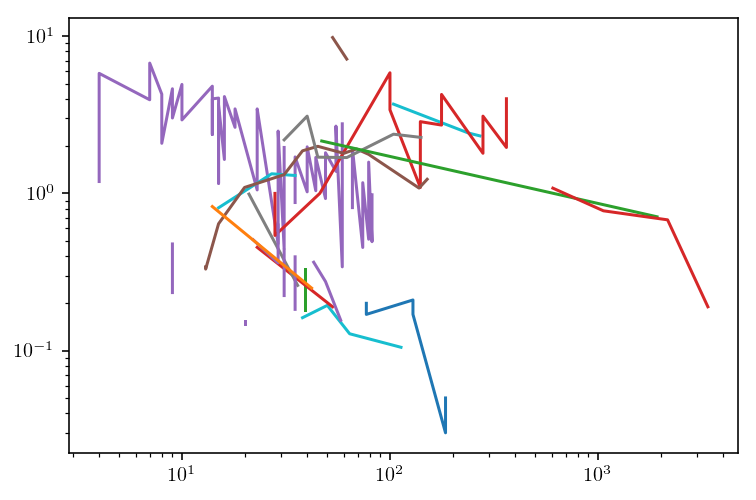

In [20]:
plt.subplots()
n = 0

for name, SN in SNe.items():
    if not SN.has_explosion_time:
        print(SN.explosion_date)
        continue
    n += 1
    mask = SN.is_limit
    t = ma.masked_array(SN.t, mask=mask)
    flux = ma.masked_array(SN.flux, mask=mask)
    plt.loglog(t, flux)
    #plt.loglog((SN.t), (SN.flux))
    #plt.loglog(np.abs(SN.t), np.abs(SN.flux))
n

### 1.2 Green's Catalogue

In [21]:
# first let's parse snrs.list.html
# names:
path = '../data/snr_website/www.mrao.cam.ac.uk/surveys/snrs/snrs.list.html'
snr_name_arr = dt.load_Green_catalogue_names(path=path)

# catalogue:
pathroot = '../data/snr_website/www.mrao.cam.ac.uk/surveys/snrs/'
snrs_dct = dt.load_Green_catalogue(snr_name_arr, pathroot=pathroot, verbose=0)

In [22]:
name = 'G8.9+0.4'

print(snrs_dct[name].get_spectral_index())
print(snrs_dct[name].is_spectral_certain)
print(snrs_dct[name].get_type())
print(snrs_dct[name].is_type_certain)

del name

0.6
True
S
True


In [23]:
# luminosity v. diameter
path = '../data/Green_2005_lum_diam.csv'
green2005_lum_diam_arr = np.loadtxt(path, delimiter=',')

# surface brightness v. diameter
path = '../data/Green_2005_SB_diam.csv'
green2005_SB_diam_arr = np.loadtxt(path, delimiter=',')

In [24]:
# length of catalogues
print(len(snrs_dct))
print(len(green2005_lum_diam_arr))
print(len(green2005_SB_diam_arr))

294
47
47


In [25]:
dir(snrs_dct['G337.0-0.1'])

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alpha',
 'ang_size',
 'b',
 'get_SB',
 'get_age',
 'get_coord',
 'get_diameter',
 'get_distance',
 'get_flux_density',
 'get_latitude',
 'get_longitude',
 'get_luminosity',
 'get_radius',
 'get_size',
 'get_spectral_index',
 'get_type',
 'is_complete',
 'is_flux_certain',
 'is_spectral_certain',
 'is_type_certain',
 'l',
 'name',
 'no_dist',
 'no_flux',
 'set_age',
 'set_coord',
 'set_distance',
 'set_flux_density',
 'set_name',
 'set_size',
 'set_spectral',
 'set_sr',
 'set_type',
 'snu_at_1GHz',
 'sr',
 'type']

## 2. Scatter plots

#### $L_\nu$ vs diameter

/home/buenabad/.local/lib/python2.7/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


294

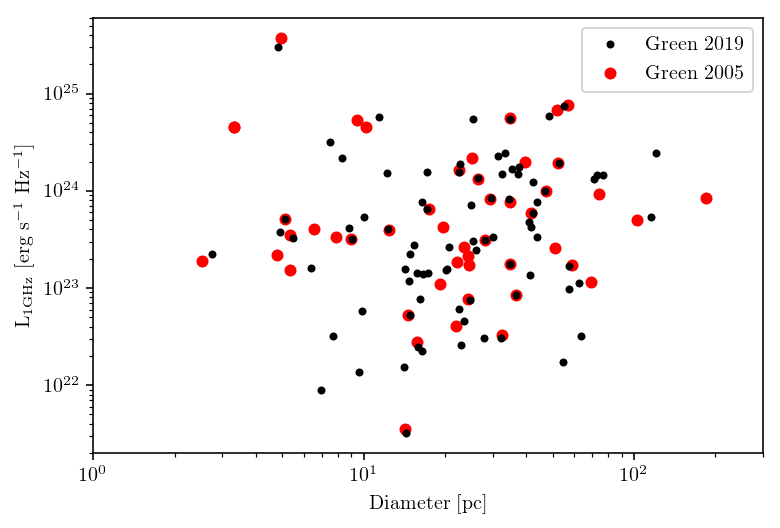

In [26]:
counter = 0

# lum plot and compare with Green 2005
plt.subplots()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Diameter [pc]')
plt.ylabel(r'L$_{1\mathrm{GHz}}$ [erg s$^{-1}$ Hz$^{-1}$]')
plt.xlim(1, 300)

for _, snr in snrs_dct.items():
        diam = snr.get_diameter()
        lum = snr.get_luminosity()
        plt.plot(diam, lum, 'k.')
        counter += 1
plt.plot(diam, lum, 'k.', label='Green 2019')

# compare with Green 2005
_J_over_erg_ = 1.e7
plt.plot(green2005_lum_diam_arr[:,0], green2005_lum_diam_arr[:,1]*_J_over_erg_, 'ro', markersize=5, zorder=0)
plt.plot(green2005_lum_diam_arr[1,0], green2005_lum_diam_arr[1,1]*_J_over_erg_, 'ro', markersize=5, zorder=0, label='Green 2005')

plt.legend(loc='best')

counter

#### $\Sigma_\nu$ vs diameter

84

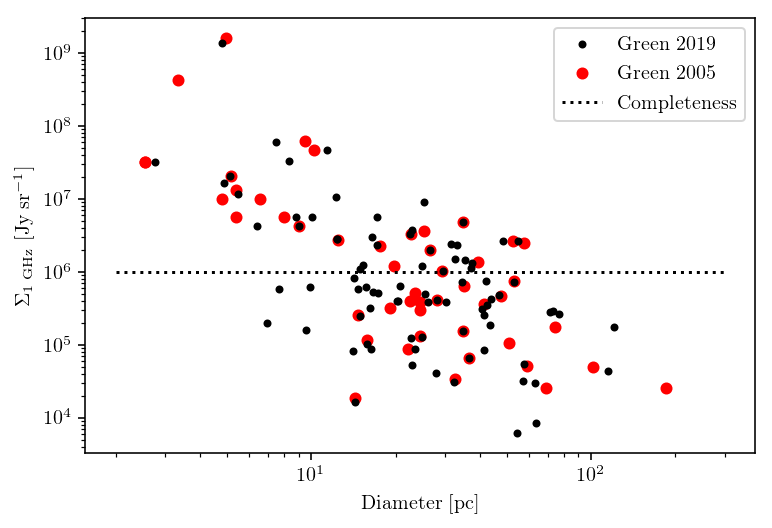

In [27]:
counter = 0

# Sigma plot
plt.subplots()
plt.yscale('log')
plt.xscale('log')
# plt.xlabel('Distance [kpc]')
plt.xlabel('Diameter [pc]')
plt.ylabel(r'$\Sigma_{1\;\mathrm{GHz}}$ [Jy sr$^{-1}$]')

for _, snr in snrs_dct.items():
    if snr.no_dist is False and snr.no_flux is False:        
        diam = snr.get_diameter()
        Sigma = snr.get_SB()
        plt.plot(diam, Sigma, 'k.')
        counter += 1
        
plt.plot(green2005_SB_diam_arr[:,0], green2005_SB_diam_arr[:,1]/ct._Jy_over_SI_, 'ro', markersize=5, zorder=0)

# completeness cut
plt.hlines(1e-20 / ct._Jy_over_SI_, 2, 300, linestyles=":", label='Completeness')

# labels
plt.plot(diam, Sigma, 'k.', label='Green 2019')
plt.plot(green2005_SB_diam_arr[0,0], green2005_SB_diam_arr[0,1]/ct._Jy_over_SI_, 'ro', markersize=5, zorder=0, label='Green 2005')
plt.legend(loc='best')

counter

#### $S_\nu$ vs distance

84

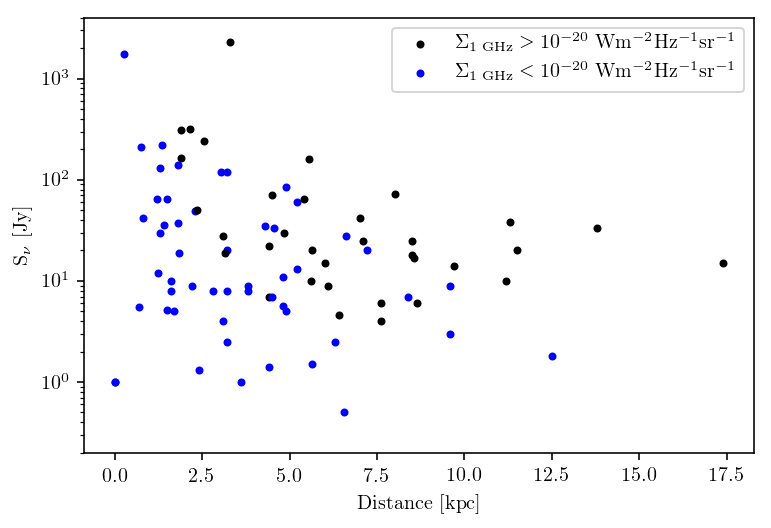

In [28]:
counter = 0

plt.subplots()
plt.yscale('log')
plt.xlabel('Distance [kpc]')
plt.ylabel(r'S$_\nu$ [Jy]')
plt.ylim(0.2, 4000)

for _, snr in snrs_dct.items():
    if snr.no_dist is False and snr.no_flux is False:
        snr.get_SB()
        if snr.is_complete:        
            plt.plot(snr.distance, snr.snu_at_1GHz, 'k.')
        else:
            plt.plot(snr.distance, snr.snu_at_1GHz, 'b.')
        counter += 1
        
# labels
plt.plot([1,0.01], 'k.', label='$\Sigma_{1\;\mathrm{GHz}} > 10^{-20} \;\mathrm{Wm^{-2} Hz^{-1}sr^{-1}}$')
plt.plot([1,0.01], 'b.', label='$\Sigma_{1\;\mathrm{GHz}} < 10^{-20} \;\mathrm{Wm^{-2} Hz^{-1}sr^{-1}}$')
plt.legend(loc='best')
counter

#### $L_\nu$ vs distance

34

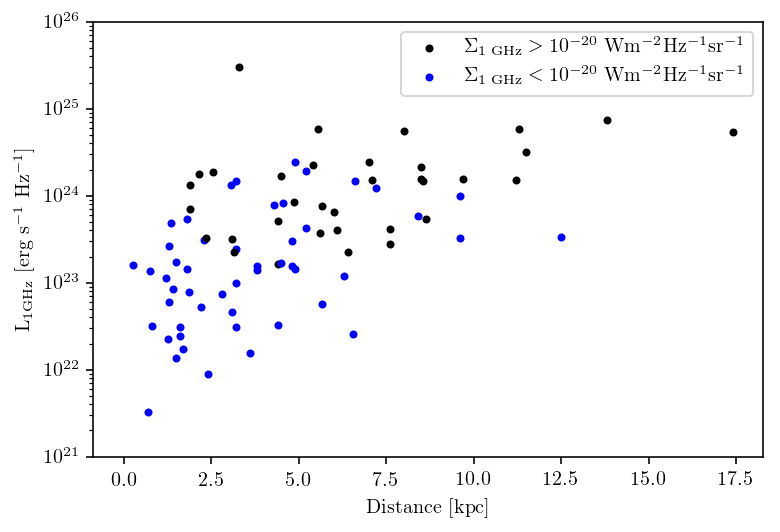

In [29]:
# lum plot
plt.subplots()
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Distance [kpc]')
plt.ylabel(r'L$_{1\mathrm{GHz}}$ [erg s$^{-1}$ Hz$^{-1}$]')
plt.ylim(1e21, 1e26)

counter = 0
for _, snr in snrs_dct.items():
    if snr.no_dist is False and snr.no_flux is False:
        dist = snr.distance
        snu = snr.snu_at_1GHz
        lum = snr.get_luminosity()
        snr.get_SB()
        if snr.is_complete:
            plt.plot(snr.distance, lum, 'k.')
            counter += 1
        else:
            plt.plot(snr.distance, lum, 'b.')

# labels
plt.plot([1,0.01], 'k.', label='$\Sigma_{1\;\mathrm{GHz}} > 10^{-20} \;\mathrm{Wm^{-2} Hz^{-1}sr^{-1}}$')
plt.plot([1,0.01], 'b.', label='$\Sigma_{1\;\mathrm{GHz}} < 10^{-20} \;\mathrm{Wm^{-2} Hz^{-1}sr^{-1}}$')
plt.legend(loc='best')

counter

## 3. Histograms

In [30]:
# These are already loaded in dt. This is just to show you how to do it.

# # first let's parse snrs.list.html
# # names:
# path = '../data/snr_website/www.mrao.cam.ac.uk/surveys/snrs/snrs.list.html'
# snr_name_arr = dt.load_Green_catalogue_names(path=path)

# # catalogue:
# pathroot = '../data/snr_website/www.mrao.cam.ac.uk/surveys/snrs/'
# snrs_dct = dt.load_Green_catalogue(snr_name_arr, pathroot=pathroot, verbose=0)

In [31]:
for name, snr in dt.snrs_cut.items():
    print(name+" size:  \t%.1e" % snr.get_size())

G352.7-0.1 size:  	3.2e-06
G349.7+0.2 size:  	3.3e-07
G11.2-0.3 size:  	1.1e-06
G292.0+1.8 size:  	6.4e-06
G316.3-0.0 size:  	2.7e-05
G82.2+5.3 size:  	4.1e-04
G296.8-0.3 size:  	1.9e-05
G18.1-0.1 size:  	4.3e-06
G53.6-2.2 size:  	6.1e-05
G54.4-0.3 size:  	1.1e-04
G18.9-1.1 size:  	7.2e-05
G39.2-0.3 size:  	3.2e-06
G89.0+4.7 size:  	7.2e-04
G34.7-0.4 size:  	6.3e-05
G94.0+1.0 size:  	5.0e-05
G4.5+6.8 size:  	6.0e-07
G337.2-0.7 size:  	2.4e-06
G114.3+0.3 size:  	3.3e-04
G18.6-0.2 size:  	2.4e-06
G260.4-3.4 size:  	2.0e-04
G18.8+0.3 size:  	1.2e-05
G327.4+0.4 size:  	2.9e-05
G15.4+0.1 size:  	1.4e-05
G20.0-0.2 size:  	6.6e-06
G54.1+0.3 size:  	9.6e-06
G304.6+0.1 size:  	4.3e-06
G116.5+1.1 size:  	3.2e-04
G108.2-0.6 size:  	2.5e-04
G344.7-0.1 size:  	4.3e-06
G109.1-1.0 size:  	5.2e-05
G33.6+0.1 size:  	6.6e-06
G350.1-0.3 size:  	1.1e-06
G32.8-0.1 size:  	2.2e-05
G290.1-0.8 size:  	1.8e-05
G205.5+0.5 size:  	3.2e-03
G39.7-2.0 size:  	4.8e-04
G111.7-2.1 size:  	1.7e-06
G23.3-0.3 size:  	4.8

In [32]:
for name, snr in dt.snrs_cut.items():
    print(name+" dist:  \t%.1e" % snr.get_distance())

G352.7-0.1 dist:  	7.6e+00
G349.7+0.2 dist:  	1.2e+01
G11.2-0.3 dist:  	4.4e+00
G292.0+1.8 dist:  	6.0e+00
G316.3-0.0 dist:  	7.2e+00
G82.2+5.3 dist:  	3.2e+00
G296.8-0.3 dist:  	9.6e+00
G18.1-0.1 dist:  	6.4e+00
G53.6-2.2 dist:  	2.8e+00
G54.4-0.3 dist:  	6.6e+00
G18.9-1.1 dist:  	1.8e+00
G39.2-0.3 dist:  	8.5e+00
G89.0+4.7 dist:  	1.4e+00
G34.7-0.4 dist:  	2.5e+00
G94.0+1.0 dist:  	5.2e+00
G4.5+6.8 dist:  	3.1e+00
G337.2-0.7 dist:  	5.7e+00
G114.3+0.3 dist:  	7.0e-01
G18.6-0.2 dist:  	4.4e+00
G260.4-3.4 dist:  	1.3e+00
G18.8+0.3 dist:  	1.4e+01
G327.4+0.4 dist:  	4.8e+00
G15.4+0.1 dist:  	4.8e+00
G20.0-0.2 dist:  	1.1e+01
G54.1+0.3 dist:  	6.5e+00
G304.6+0.1 dist:  	9.7e+00
G116.5+1.1 dist:  	1.6e+00
G108.2-0.6 dist:  	3.2e+00
G344.7-0.1 dist:  	6.3e+00
G109.1-1.0 dist:  	3.2e+00
G33.6+0.1 dist:  	5.7e+00
G350.1-0.3 dist:  	7.6e+00
G32.8-0.1 dist:  	4.8e+00
G290.1-0.8 dist:  	7.0e+00
G205.5+0.5 dist:  	1.8e+00
G39.7-2.0 dist:  	4.9e+00
G111.7-2.1 dist:  	3.3e+00
G23.3-0.3 dist:  	4.5

In [33]:
alphas = []
sizes = []
dists = []
radii = []
for name, snr in dt.snrs_cut.items():
    
    alpha = snr.alpha
    alphas.append(alpha)
    
    sz = snr.get_size()
    sizes.append(sz)
    
    d = snr.get_distance()
    dists.append(d)
    
    r = snr.get_radius()
    radii.append(r)
    
alphas = np.array(alphas)
sizes = np.array(sizes)
dists = np.array(dists)
radii = np.array(radii)

/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_alpha_dist.pdf


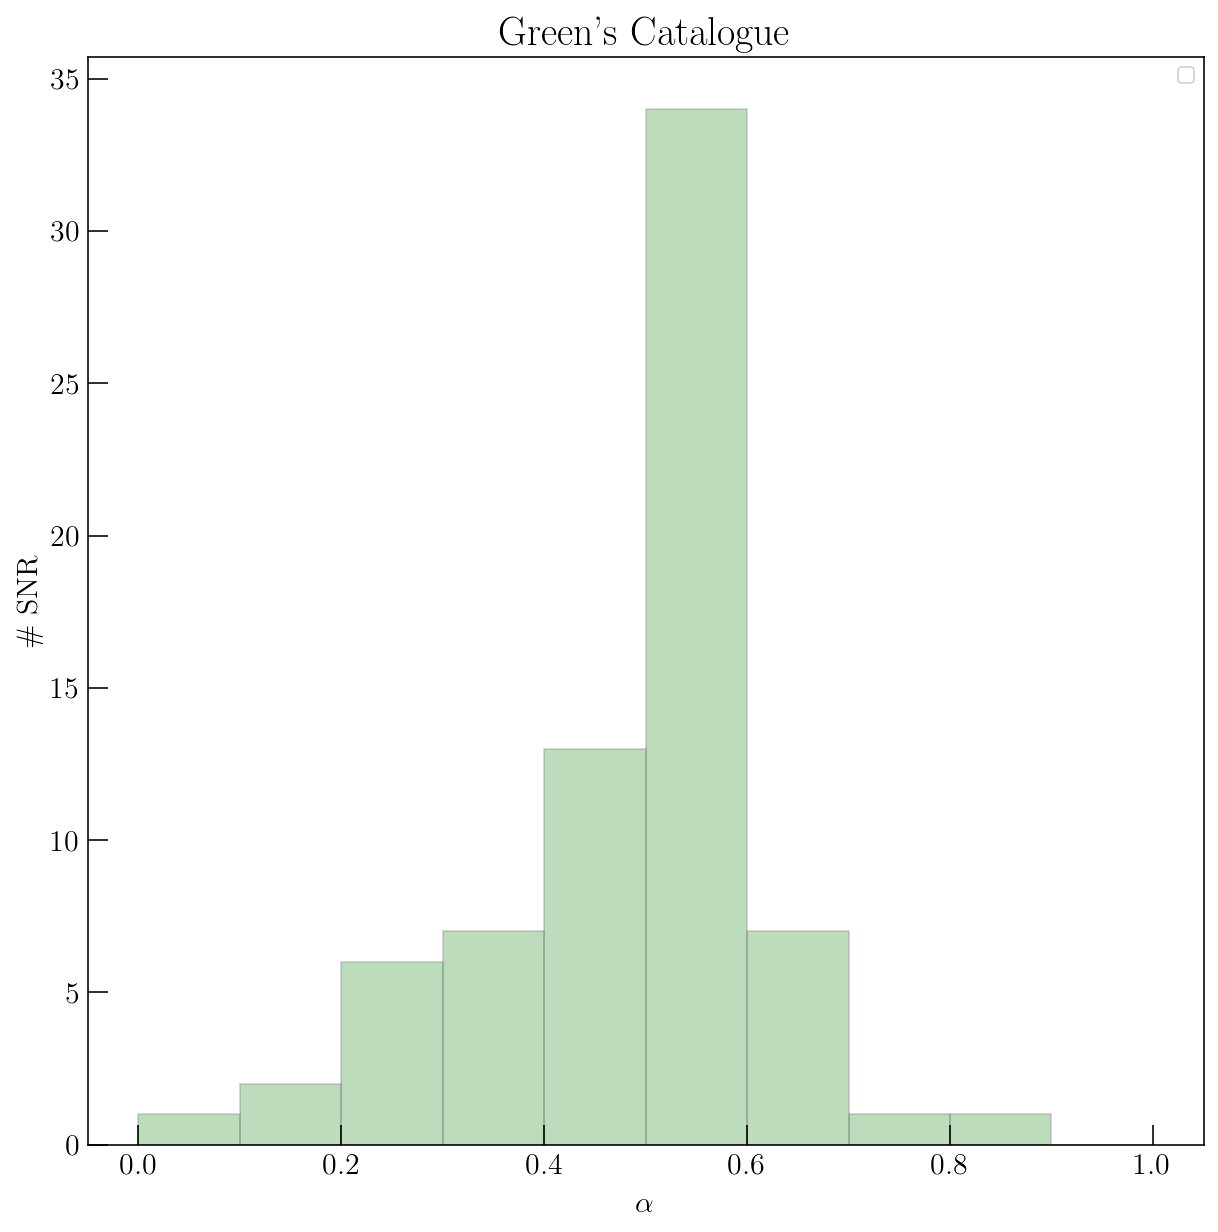

In [34]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(0., 1., 11);
plt.hist(alphas,
         bins=bins,
         alpha=0.3,
         color='forestgreen',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$\alpha$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_alpha_dist.pdf"
print(file_name)

# plt.savefig(file_name, bbox_inches="tight")

/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_nu-fac_dist.pdf


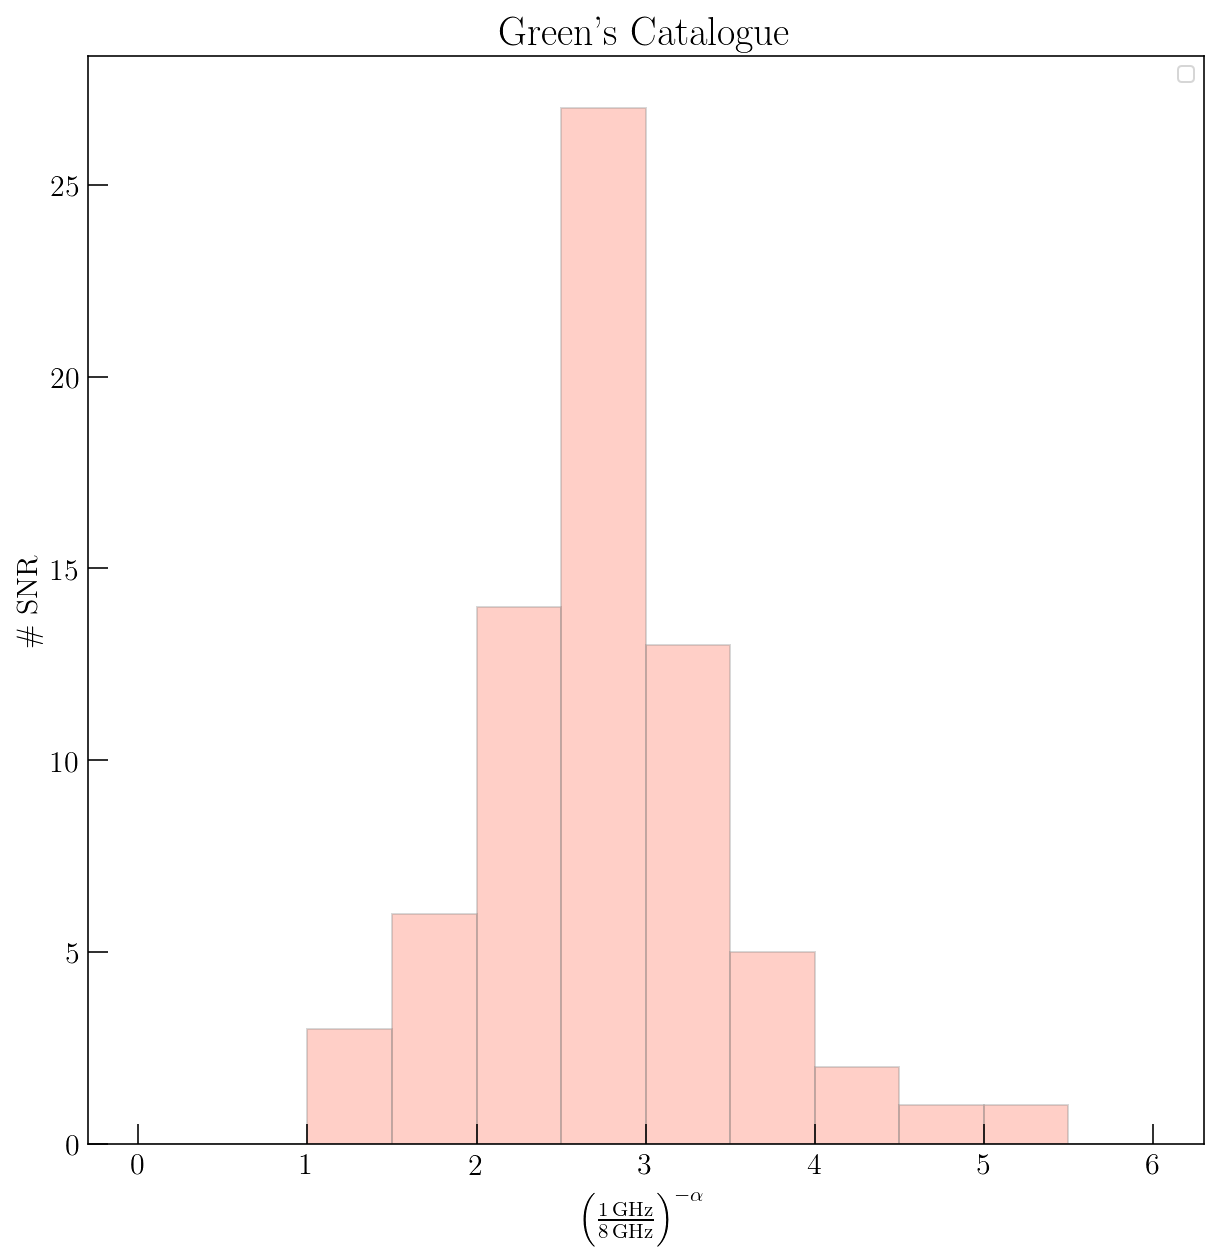

In [35]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(0., 6., 13);

nu_facs = ap.nu_factor(1., 8., alphas)

plt.hist(nu_facs,
         bins=bins,
         alpha=0.3,
         color='tomato',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$\bigg( \frac{1\,\mathrm{GHz}}{8\,\mathrm{GHz}} \bigg)^{-\alpha}$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_nu-fac_dist.pdf"
print(file_name)

# plt.savefig(file_name, bbox_inches="tight")

In [36]:
# computing the mean, std, min, and max of the SNR distances

dists = np.array([snr.distance for name, snr in dt.snrs_dct.items() if not snr.no_dist])

print("No. of distances: {}".format(len(dists)))
print("mean:\t{} kpc\nstd:\t{} kpc\nmin:\t{} kpc\nmax:\t{} kpc".format(dists.mean(), dists.std(), dists.min(), dists.max()))

No. of distances: 90
mean:	4.74627777778 kpc
std:	3.26770727993 kpc
min:	0.275 kpc
max:	17.4 kpc


In [37]:
# computing the mean, std, min, and max of the SNR distances with certain flux

dists = np.array([snr.distance for name, snr in dt.snrs_cut.items()])

print("No. of distances: {}".format(len(dists)))
print("mean:\t{} kpc\nstd:\t{} kpc\nmin:\t{} kpc\nmax:\t{} kpc".format(dists.mean(), dists.std(), dists.min(), dists.max()))

No. of distances: 72
mean:	5.12152777778 kpc
std:	3.35237091048 kpc
min:	0.7 kpc
max:	17.4 kpc


/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_D_dist.pdf


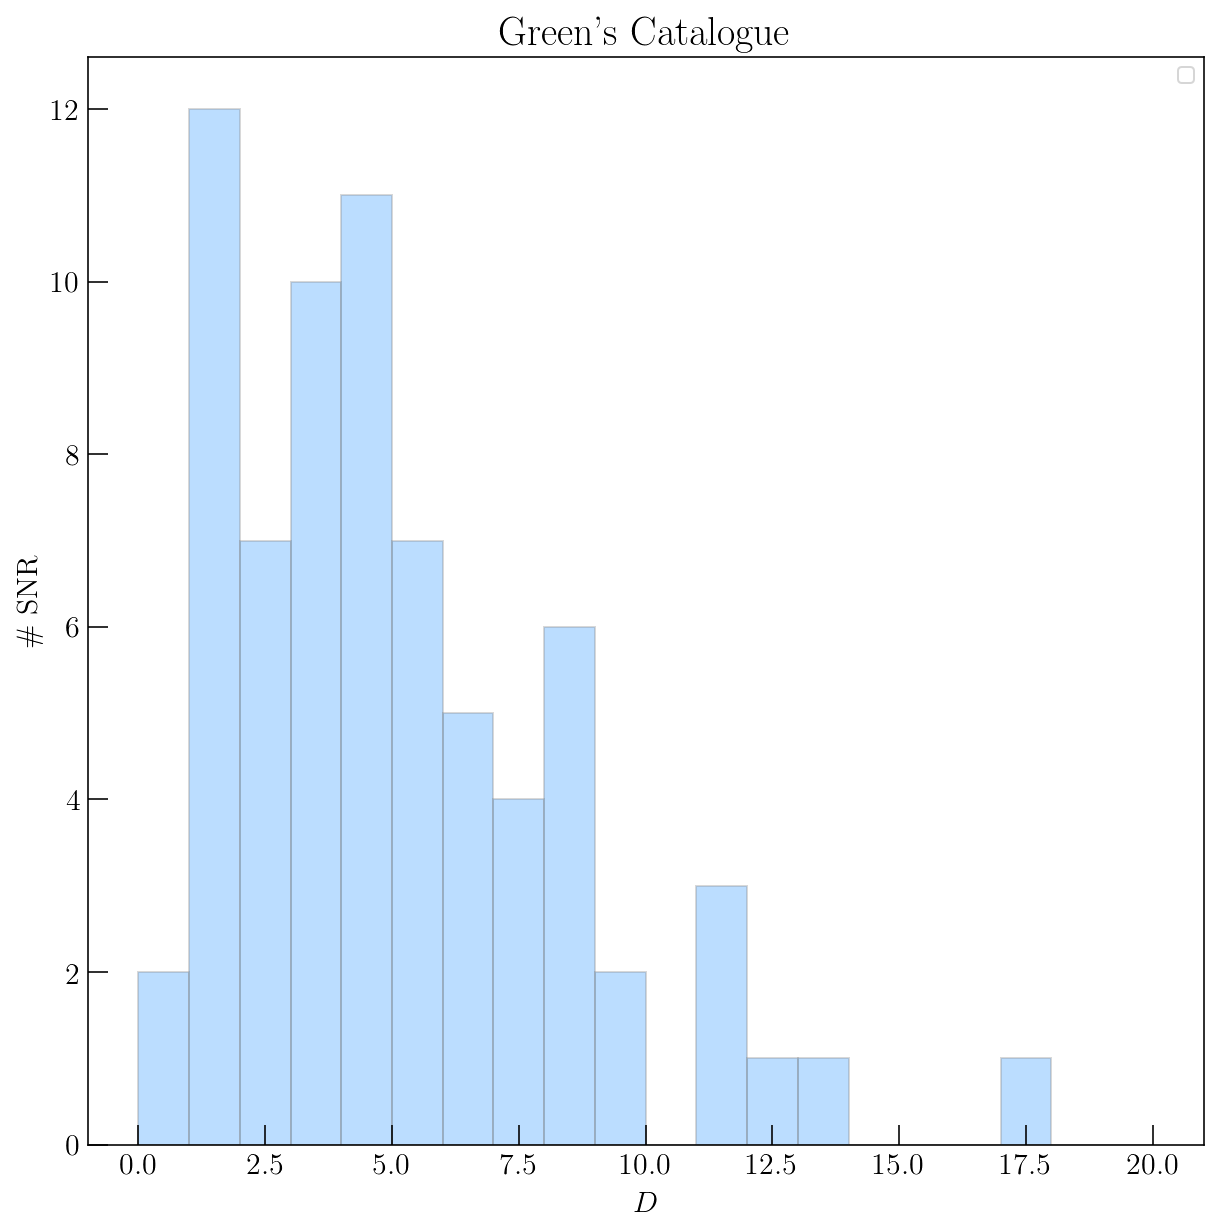

In [38]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(0., 20., 21);
plt.hist(dists,
         bins=bins,
         alpha=0.3,
         color='dodgerblue',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$D$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_D_dist.pdf"
print(file_name)

# plt.savefig(file_name, bbox_inches="tight")

/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_size_dist.pdf


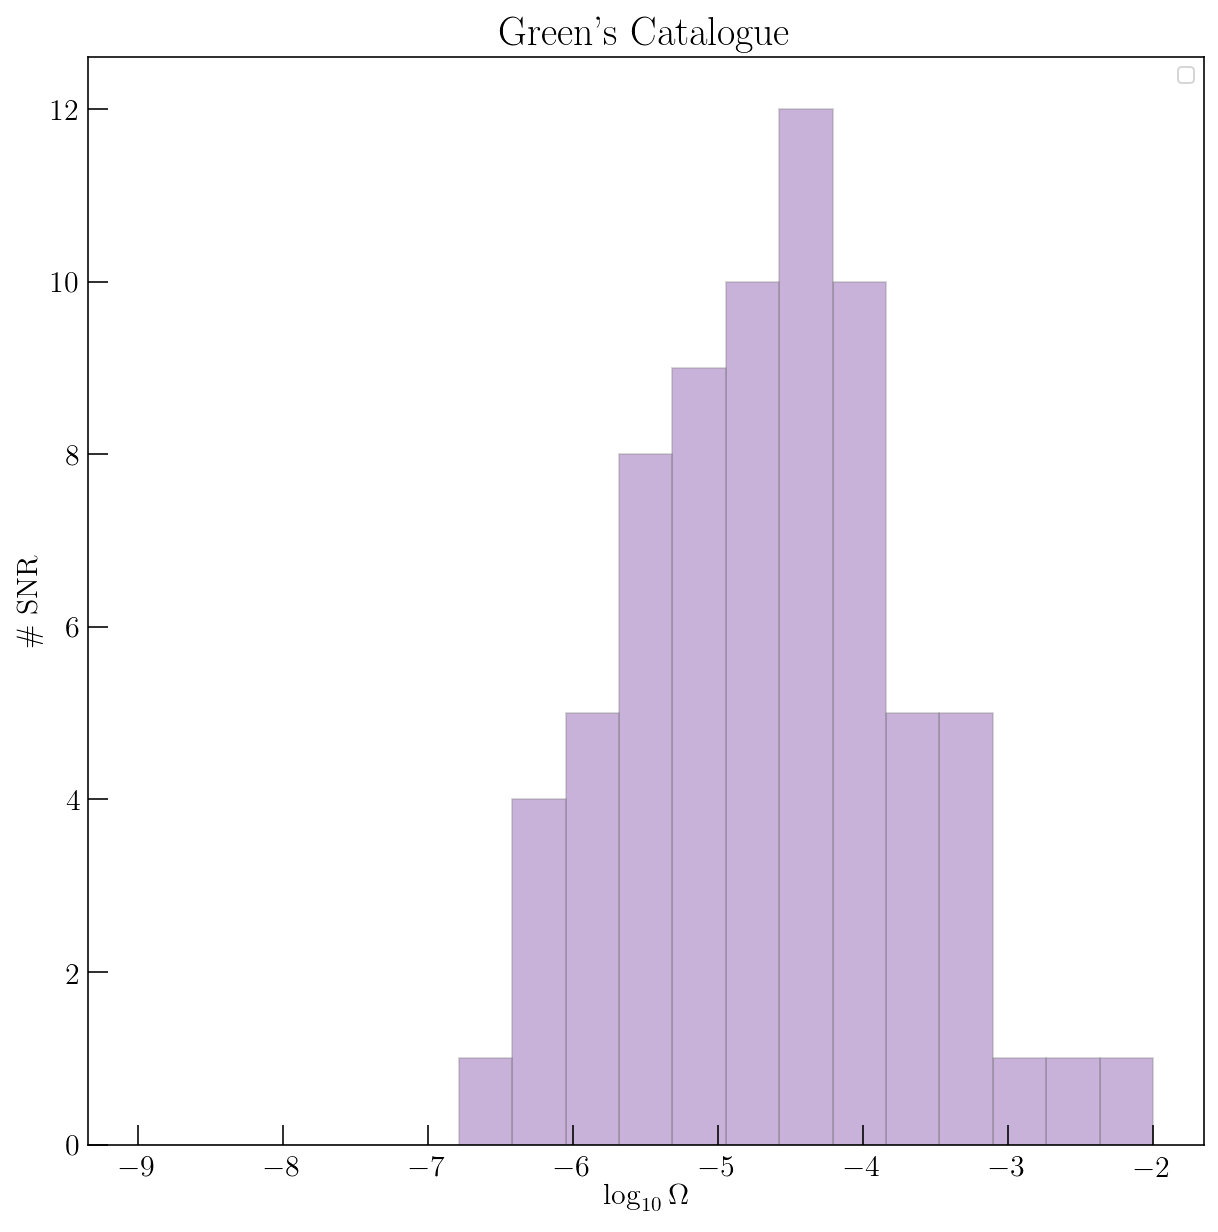

In [39]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(-9, -2, 20);
plt.hist(log10(sizes),
         bins=bins,
         alpha=0.3,
         color='indigo',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$\log_{10} \Omega$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_size_dist.pdf"
print(file_name)

# plt.savefig(file_name, bbox_inches="tight")

/home/buenabad/Documents/codes/git_codes/snr_ghosts/workspace_notebooks/plots/snr_properties/GC_radii_dist.pdf


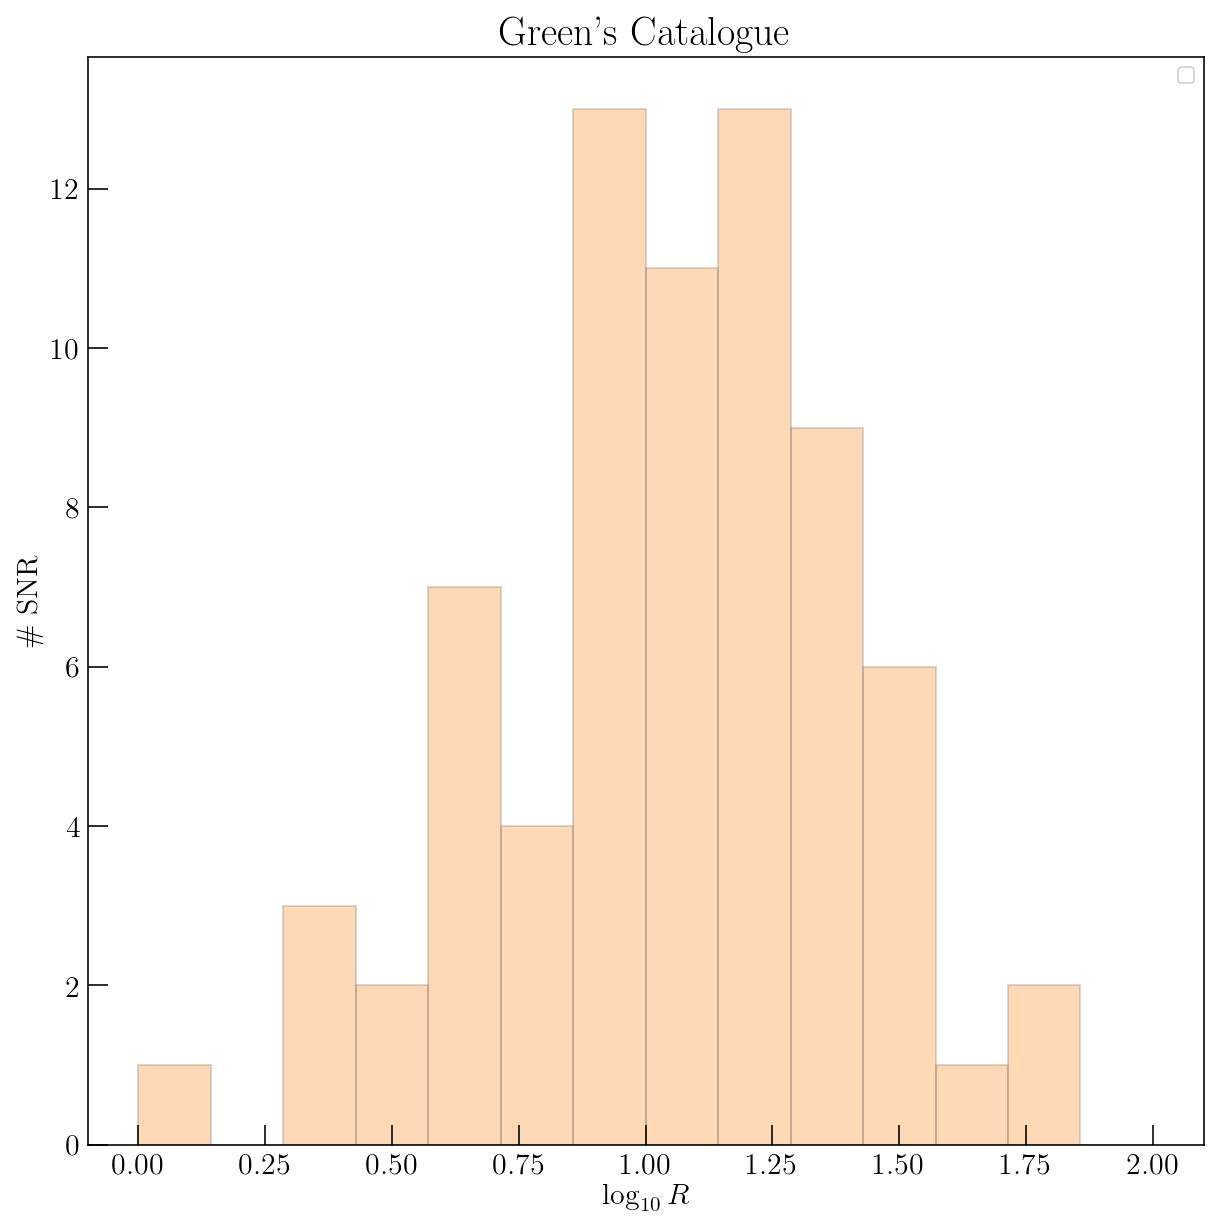

In [40]:
# figure properties
title_sz = 20.
label_sz = 15.
legend_sz = 15.
rcParams['figure.figsize'] = (10, 10)

bins = np.linspace(0, 2, 15);
plt.hist(log10(radii),
         bins=bins,
         alpha=0.3,
         color='C1',
         ec='grey'
        )

title = "Green's Catalogue";
plt.title(title, fontsize=title_sz);

plt.ylabel(r"\# SNR", fontsize=label_sz);
plt.xlabel(r"$\log_{10} R$", fontsize=label_sz);
plt.tick_params("both", which="both", labelsize=label_sz, direction="in", length=10.);
plt.legend(loc='best');

file_name = current_dir+"/plots/snr_properties/GC_radii_dist.pdf"
print(file_name)

## 4. Time estimation

In [9]:
# Also called Cassiopeia A
CasA = 'G111.7-2.1'
dt.snrs_cut[CasA].__dict__

{'age': 321.0,
 'alpha': 0.77,
 'ang_size': 5.0,
 'b': -2.1,
 'distance': 3.3,
 'is_complete': False,
 'is_flux_certain': True,
 'is_spectral_certain': True,
 'is_type_certain': True,
 'l': 111.7,
 'name': 'G111.7-2.1',
 'no_dist': False,
 'no_flux': False,
 'radius': 2.3998277214922035,
 'snu_at_1GHz': 2300.0,
 'sr': 1.6614302187698022e-06,
 'type': 'S'}

In [10]:
# Also called W50
W50 = 'G39.7-2.0'
dt.snrs_cut[W50].__dict__

{'age': 54772.25575051661,
 'alpha': 0.7,
 'ang_size': 84.8528137423857,
 'b': -2.0,
 'distance': 4.9,
 'is_complete': False,
 'is_flux_certain': False,
 'is_spectral_certain': False,
 'is_type_certain': False,
 'l': 39.7,
 'name': 'G39.7-2.0',
 'no_dist': False,
 'no_flux': False,
 'radius': 60.47257332493333,
 'snu_at_1GHz': 85.0,
 'sr': 0.0004784858509023251}

In [11]:
# Also called W28
W28 = 'G6.4-0.1'
dt.snrs_dct[W28].__dict__

{'age': 34467.37587922817,
 'ang_size': 48.0,
 'b': -0.1,
 'distance': 1.9,
 'is_complete': False,
 'is_flux_certain': True,
 'is_spectral_certain': False,
 'is_type_certain': True,
 'l': 6.4,
 'name': 'G6.4-0.1',
 'no_dist': False,
 'no_flux': False,
 'radius': 13.264502315156903,
 'snu_at_1GHz': 310.0,
 'sr': 0.00015311679381005744,
 'type': 'C'}

### 4.1 Age model

In [13]:
help(dt.age_from_radius)

Help on function age_from_radius in module data:

age_from_radius(R, method=None, **kwargs)
    Computes the age [years] of a SNR based on its radius [pc].



In [14]:
help(dt.pheno_age)

Help on function pheno_age in module astro:

pheno_age(R, Rst=3.8, tst=360.0, eta1=1.0, eta2=0.4)
    SNR age [years] as deduced from a phenomenological broken power-law function of the SNR blast radius [pc]. The default values are taken from Tables 2 & 3 of the Truelove-McKee '99 paper for n=0 ejecta, with M_ej = 1 M_sun, E_sn = 1.e51 erg, and n0 = 0.2 cm^-3.
    
    Parameters
    ----------
    R : SNR radius [pc]
    Rst : radius [pc] at the start of the Sedov-Taylor (adiabatic) expansion phase (default: 3.8)
    tst : age [years] at the start of the Sedov-Taylor (adiabatic) expansion phase (default 360.)
    eta1 : the power scaling R~t^eta1 during the Ejecta-Dominated phase (default: 1.)
    eta2 : the power scaling R`t^eta2 during the Sedov-Taylor expansion phase (default: 2/5 = 0.4)



In [15]:
help(dt.physics_age)

Help on function physics_age in module astro:

physics_age(R, model='estimate', M_ej=1.0, E_sn=1.0, rho0=1.0)
    SNR age [years] as deduced from a physically-motivated a function of the SNR blast radius [pc]. Using either a simple model, or formulas by Truelove & McKee 1999 (TM99).
    
    Parameters
    ----------
    R : SNR radius today [pc]
    model : 'estimate'/'TM99-simple'/TM99-0'': whether the simple one-phase 'estimate' model is used, or instead the two-phase Truelove-McKee model (ED-ST, or Ejecta-Dominated -- Sedov-Taylor), either in a simplified form, or for n=0 (uniform) ejecta profile.
    M_ej : Mass of the ejecta [M_sun] (default: 1.)
    E_sn : Energy of the SNR [1.e51 ergs] (default: 1.)
    rho0 : Mass density of surrounding medium [m_proton/cm^3] (default: 1.)



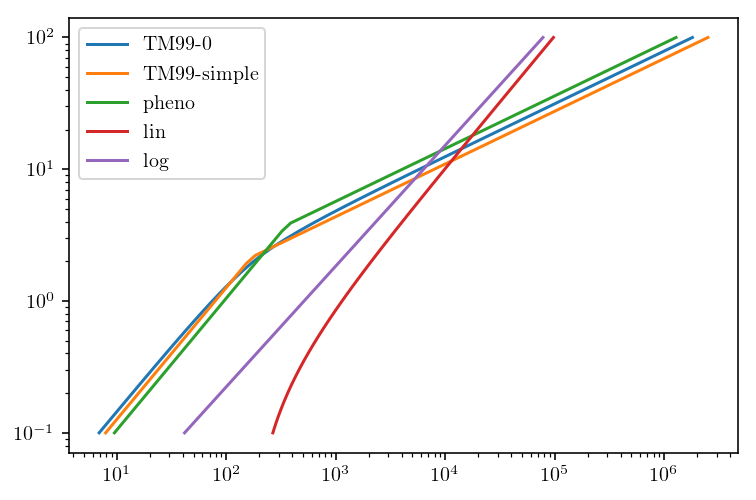

In [17]:
R_arr = np.logspace(-1, 2)

tarr = np.array([dt.age_from_radius(R, method='TM99-0') for R in R_arr])
tarr2 = np.array([dt.age_from_radius(R, method='TM99-simple') for R in R_arr])
tarr3 = np.array([dt.age_from_radius(R, method="pheno") for R in R_arr])
tarr4 = np.array([dt.age_from_radius(R, method="lin") for R in R_arr])
tarr5 = np.array([dt.age_from_radius(R, method="log") for R in R_arr])

plt.loglog(tarr, R_arr, label="TM99-0")
plt.loglog(tarr2, R_arr, label="TM99-simple")
plt.loglog(tarr3, R_arr, label="pheno")
plt.loglog(tarr4, R_arr, label="lin")
plt.loglog(tarr5, R_arr, label="log")

plt.legend();

### 4.2 Results

In [19]:
snr = dt.snrs_cut[CasA]

RCasA = snr.get_radius()
print 'CasA: R={} pc, age={} years'.format(RCasA, snr.age)

# rho0 and M_ej values from TM99 Table 1
print 'estimate', dt.age_from_radius(RCasA, method='estimate', rho0=3.2, M_ej=3.)
print 'TM99-simple', dt.age_from_radius(RCasA, method='TM99-simple', rho0=3.2, M_ej=3.)
print 'TM99-0', dt.age_from_radius(RCasA, method='TM99-0', rho0=3.2, M_ej=3.)
print 'pheno', dt.age_from_radius(RCasA, method="pheno")
print 'TM99-0', dt.age_from_radius(RCasA, method='TM99-0', rho0=3.2, M_ej=3.)
print 'TM99-0', dt.age_from_radius(RCasA, method='TM99-0', rho0=3.2, M_ej=3.)

del snr

 CasA: R=2.39982772149 pc, age=321.0 years
estimate 1001.2986332109173
TM99-simple 398.87284747294626
TM99-0 414.8788657309189
pheno 227.3520999308403
TM99-0 414.8788657309189
TM99-0 414.8788657309189


In [20]:
M_ej_bench = 1.
rho0_bench = 1.
E_sn_bench = 1.

for name, snr in dt.snrs_age_only.items():
    try:
        snr.get_distance()
    except:
        continue
    
    Rsnr = snr.get_radius()
    print 'SNR {}:\n\tR={} pc, age={} years\n'.format(name, Rsnr, snr.age)
    print '\testimate', dt.age_from_radius(Rsnr, method='estimate', M_ej=M_ej_bench, rho0=rho0_bench, E_sn=E_sn_bench)
    print '\tTM99-simple', dt.age_from_radius(Rsnr, method='TM99-simple', M_ej=M_ej_bench, rho0=rho0_bench, E_sn=E_sn_bench)
    print '\tTM99-0', dt.age_from_radius(Rsnr, method='TM99-0', M_ej=M_ej_bench, rho0=rho0_bench, E_sn=E_sn_bench)
    print '\tpheno', dt.age_from_radius(Rsnr, method="pheno")
    print '\tlin', dt.age_from_radius(Rsnr, method="lin")
    print '\tlog', dt.age_from_radius(Rsnr, method="log")
    print '\n'

SNR G292.0+1.8:
	R=8.55033220108 pc, age=2989.39793269 years

	estimate 13412.073998874135
	TM99-simple 5342.773842897987
	TM99-0 3931.8989428356535
	pheno 2734.015550048003
	lin 8447.301257246978
	log 5317.556415296787


SNR G18.9-1.1:
	R=8.63937979737 pc, age=4132.79566395 years

	estimate 13764.007040744913
	TM99-simple 5482.968316229746
	TM99-0 4033.0866272917515
	pheno 2805.756162956284
	lin 8533.520566028466
	log 5378.022817486892


SNR G323.7-1.0:
	R=22.4099584982 pc, age=13856.4064606 years

	estimate 149156.12786234877
	TM99-simple 59417.168330401444
	TM99-0 42960.98929511924
	pheno 30405.079258796373
	lin 21866.72467862528
	log 15219.095999027879


SNR G31.9+0.0:
	R=6.10925836902 pc, age=7884.16133777 years

	estimate 5787.749163688724
	TM99-simple 2305.581884174409
	TM99-0 1739.755313716591
	pheno 1179.8172463580672
	lin 6083.759654257245
	log 3684.5428770112


SNR G34.7-0.4:
	R=11.4012431087 pc, age=8385.1058431 years

	estimate 27537.149689746137
	TM99-simple 10969.5758525